In [1]:
!pip install opencv-python

In [2]:
!pip install opencv-contrib-python==4.1.1.26

In [3]:
!pip install scikit-image

In [4]:
!pip install Image

In [5]:
!pip install scipy

### **Image transformation**

__An image transform can be applied to an image to convert it from one domain to another. Viewing an image in domains such as frequency or Hough space enables the identification of features that may not be as easily detected in the spatial domain. Common image transforms include:__

### Import libraries

In [6]:
import skimage
import cv2
import numpy as np

from PIL import Image, ImageFilter
from sklearn.feature_extraction import image

import matplotlib.pyplot as plt

### Load and read image data from our local disk

https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

Image source: https://unsplash.com/photos/Vkau25v1L5Q

In [7]:
img_stork = Image.open('datasets/bird.jpeg')

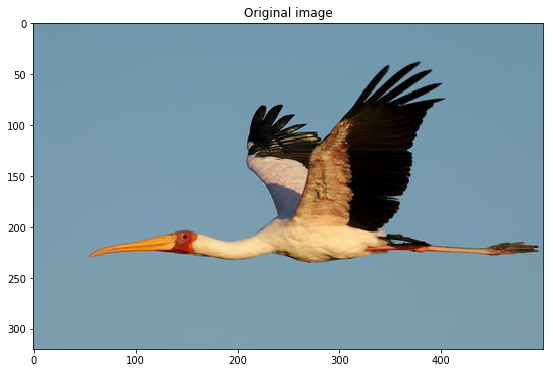

In [8]:
plt.figure(figsize=(12, 6))

plt.imshow(img_stork)
plt.title('Original image')
plt.show()

### Format of image

In [9]:
img_stork.format, img_stork.mode, img_stork.size

('JPEG', 'RGB', (500, 320))

### Convert into grayscale
Grayscale images are smaller in size and may be enough for your image processing tasks

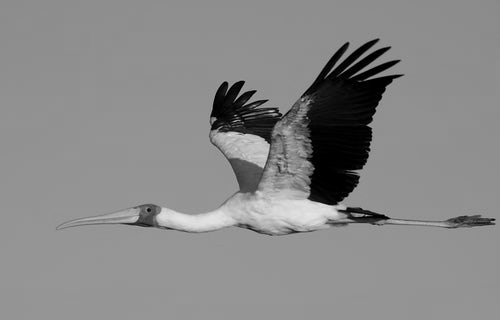

In [10]:
gs_image = img_stork.convert(mode='L')

gs_image

In [11]:
gs_image.size

(500, 320)

### Resize
* __By using thumbnail__

To feed a large number of images into ML models, you will need to standardize their sizes

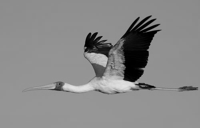

In [12]:
gs_image.thumbnail((200, 200))

gs_image

In [13]:
gs_image.size, img_stork.size

((200, 128), (500, 320))

* __By using resize function__

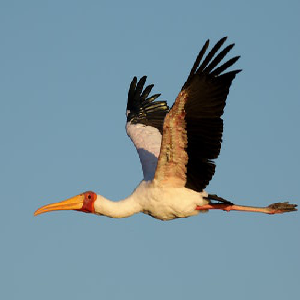

In [14]:
img_resize = img_stork.resize((300, 300))

img_resize

In [15]:
img_resize.size

(300, 300)

## Flip image

### Original image

In [16]:
hoz_flip = img_stork.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = img_stork.transpose(Image.FLIP_TOP_BOTTOM)

### Horizontal flip

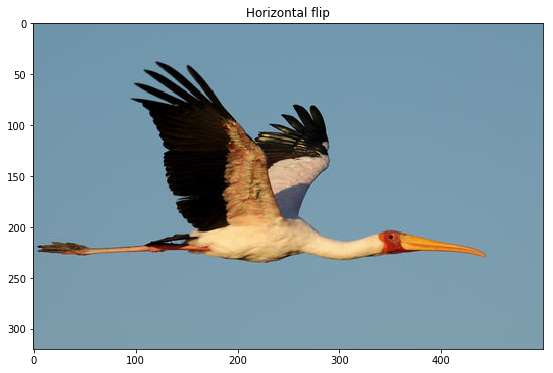

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Horizontal flip')
plt.imshow(hoz_flip)

plt.show()

### Vertical flip

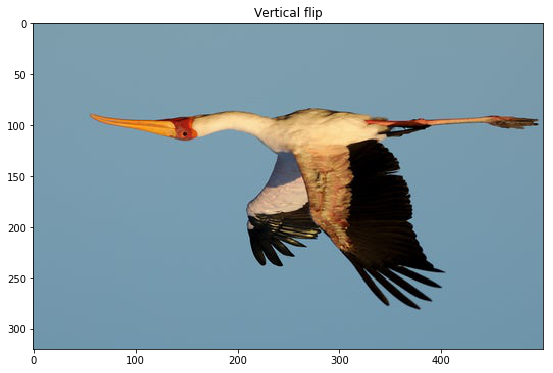

In [18]:
plt.figure(figsize=(12, 6))
plt.title('Vertical flip')
plt.imshow(ver_flip)

plt.show()

### Converted the original image into numpy N-D arrays

In [19]:
img_stork_arr = np.array(img_stork)

type(img_stork_arr)

numpy.ndarray

### Shape of N-D array

In [20]:
img_stork_arr.shape

(320, 500, 3)

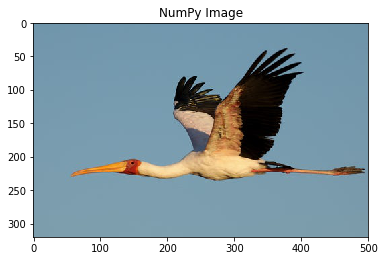

In [21]:
plt.figure (figsize = (6, 6))
plt.title("NumPy Image")
plt.imshow(img_stork_arr, cmap = 'gray')

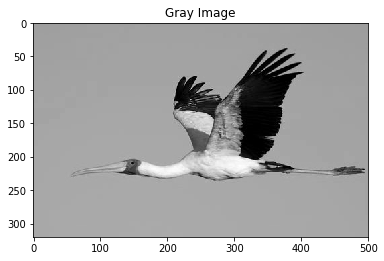

In [22]:
from skimage.color import rgb2gray

img_stork_arr_gray = rgb2gray(img_stork_arr)

plt.figure (figsize = (6,6))
plt.title("Gray Image")
plt.imshow(img_stork_arr_gray, cmap = 'gray')

In [23]:
img_stork_arr_gray.shape

(320, 500)

#### View a part of the array
Each of the 20 cells here is itself a list of 3 elements representing the 3 channels of the color image

In [24]:
img_stork_arr[100][200:220]

array([[118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [118, 155, 174],
       [122, 155, 172],
       [114, 151, 170],
       [117, 159, 181],
       [115, 157, 179],
       [120, 155, 174],
       [118, 142, 154],
       [  0,  10,  16],
       [  0,   1,   4],
       [  7,   6,  11],
       [  6,   7,   9],
       [  7,   9,   8],
       [  8,   9,   4]], dtype=uint8)

In [25]:
img_stork_arr_gray[100][200:220]

array([0.58238196, 0.58238196, 0.58238196, 0.58238196, 0.58238196,
       0.58238196, 0.58238196, 0.58238196, 0.5851498 , 0.56669569,
       0.5947498 , 0.58690667, 0.58404863, 0.54025569, 0.03257882,
       0.00393647, 0.02577647, 0.02718314, 0.03334471, 0.03304706])

In [26]:
from skimage.transform import resize

stork_resized = resize(img_stork_arr, (224, 224), anti_aliasing=True)

stork_resized.shape

(224, 224, 3)

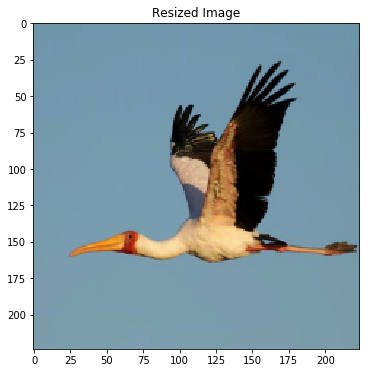

In [27]:
plt.figure (figsize = (6, 6))
plt.title("Resized Image")
plt.imshow(stork_resized, cmap = 'gray')

### Let's looks how many patches in a single image of (64 * 64)

In [28]:
img_stork_arr.shape

(320, 500, 3)

#### Creating patches out of the image
The number of patches = (320-64+1)*(500-64+1) = 112309

In [29]:
patches = image.extract_patches_2d(img_stork_arr, (64, 64))

patches.shape

(112309, 64, 64, 3)

### Visualizing the patches

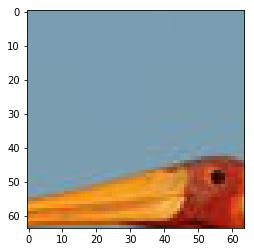

In [30]:
plt.imshow(patches[70450])
plt.show()

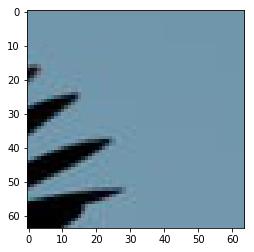

In [31]:
plt.imshow(patches[9990])
plt.show()

### In this example image is taken from skimage dataset library

https://peerj.com/articles/453/

In [32]:
from skimage import data, io, filters

### Load image data from skimage datasets

In [33]:
image = data.coins()
print(image)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


### Shape of image

In [34]:
image.shape

(303, 384)

### Original image

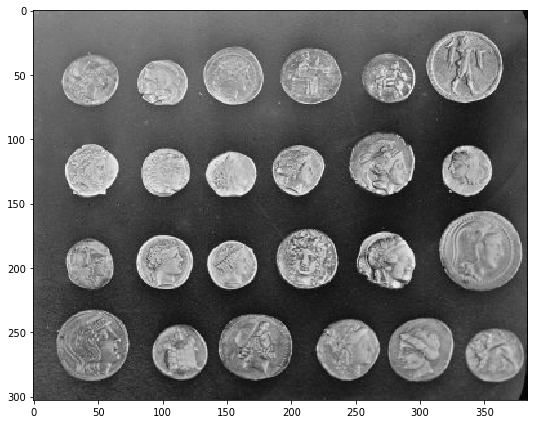

In [35]:
plt.figure(figsize=(12, 6))
io.imshow(image)

plt.show()

### Filter the image by the help of edges

In [36]:
edges = filters.sobel(image)

print(edges)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17208326 0.04307036 ... 0.03683979 0.00765711 0.        ]
 [0.         0.06139791 0.02499519 ... 0.084638   0.00490196 0.        ]
 ...
 [0.         0.03114192 0.02949335 ... 0.01669548 0.00588235 0.        ]
 [0.         0.04030354 0.0335059  ... 0.00571662 0.00980392 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


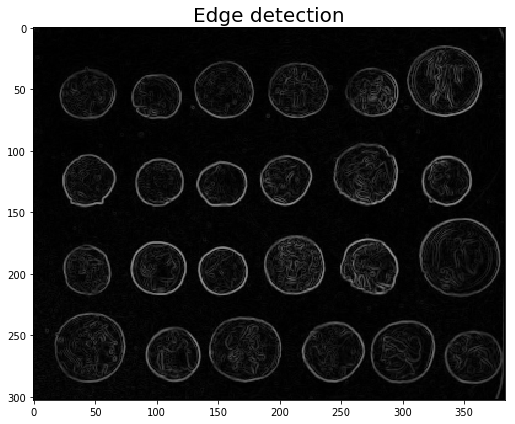

In [37]:
plt.figure(figsize=(12, 6))
plt.title('Edge detection', fontsize=20)
io.imshow(edges)

plt.show()

### Select local maxima

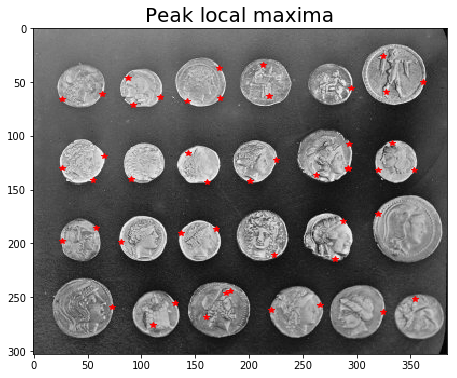

In [38]:
from skimage.feature import peak_local_max

coordinates = peak_local_max(image, min_distance=20)

fig, axes = plt.subplots(figsize=(12, 6))
axes.imshow(image, cmap=plt.cm.gray)

axes.plot(coordinates[:, 1], coordinates[:,0], 'r*')
axes.set_title('Peak local maxima', fontsize=20)

plt.show()

### Load image from local machine

In [39]:
pisa1 = cv2.imread('datasets/Taj_Mahal.jpeg')

pisa1.shape

(2525, 3840, 3)

### Show image which is loaded

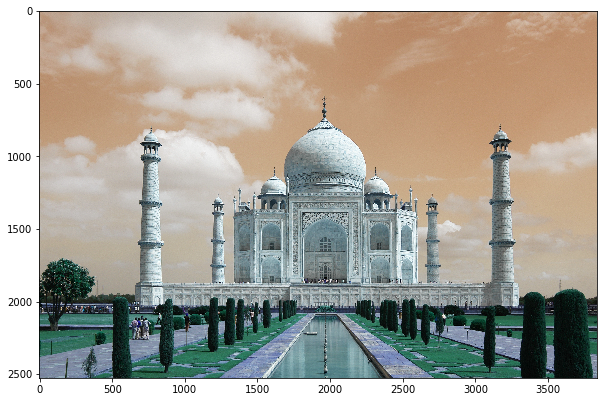

In [40]:
plt.figure(figsize=(10, 10))  

plt.imshow(pisa1);

### Convert into gray_scale

In [41]:
gray1 = cv2.cvtColor(pisa1, cv2.COLOR_BGR2GRAY)

In [42]:
sift = cv2.xfeatures2d.StarDetector_create()

sift

<xfeatures2d_StarDetector 0x7f7a053ad1d0>

In [43]:
keypoints1 = sift.detect(gray1, None)

keypoints1

[<KeyPoint 0x7f7a392dacc0>,
 <KeyPoint 0x7f7a392dae40>,
 <KeyPoint 0x7f7a392da8a0>,
 <KeyPoint 0x7f7a053d4c00>,
 <KeyPoint 0x7f7a053d4600>,
 <KeyPoint 0x7f7a053d4780>,
 <KeyPoint 0x7f7a053d4720>,
 <KeyPoint 0x7f7a053d48d0>,
 <KeyPoint 0x7f7a053d4c90>,
 <KeyPoint 0x7f7a053d4cc0>,
 <KeyPoint 0x7f7a053d4b70>,
 <KeyPoint 0x7f7a053d4c60>,
 <KeyPoint 0x7f7a053d4bd0>,
 <KeyPoint 0x7f7a053d4d80>,
 <KeyPoint 0x7f7a053d4d50>,
 <KeyPoint 0x7f7a053d4cf0>,
 <KeyPoint 0x7f7a053d4d20>,
 <KeyPoint 0x7f7a053d4db0>,
 <KeyPoint 0x7f7a053d4de0>,
 <KeyPoint 0x7f7a053d4e10>,
 <KeyPoint 0x7f7a053d4e40>,
 <KeyPoint 0x7f7a053d4e70>,
 <KeyPoint 0x7f7a053d4ea0>,
 <KeyPoint 0x7f7a053d4ed0>,
 <KeyPoint 0x7f7a053d4f00>,
 <KeyPoint 0x7f7a053d4f30>,
 <KeyPoint 0x7f7a053d4f60>,
 <KeyPoint 0x7f7a053d4f90>,
 <KeyPoint 0x7f7a053d4fc0>,
 <KeyPoint 0x7f7a04195030>,
 <KeyPoint 0x7f7a04195060>,
 <KeyPoint 0x7f7a04195090>,
 <KeyPoint 0x7f7a041950c0>,
 <KeyPoint 0x7f7a041950f0>,
 <KeyPoint 0x7f7a04195120>,
 <KeyPoint 0x7f7a041

In [44]:
pisa1 = cv2.drawKeypoints(gray1, keypoints1, outImage=None)

cv2.imwrite('sift_pisa_keypoints.jpg', pisa1)

True

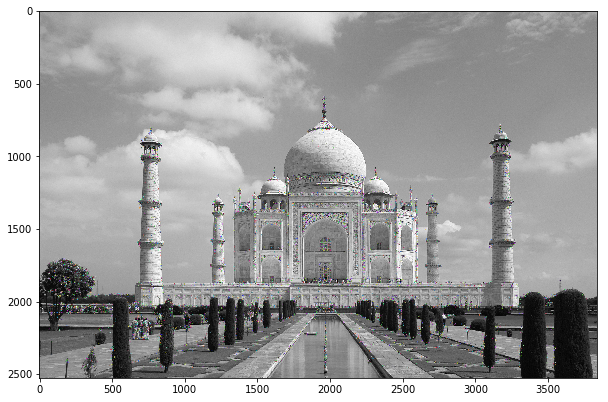

In [45]:
sift_pisa_keypoints = skimage.io.imread('sift_pisa_keypoints.jpg')

plt.figure(figsize = (10, 10))
plt.imshow(sift_pisa_keypoints, cmap = 'gray');

In [46]:
pisa_rich1 = cv2.drawKeypoints(gray1, keypoints1, outImage=None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('rich_sift_pisa_keypoints.jpg', pisa_rich1)

True

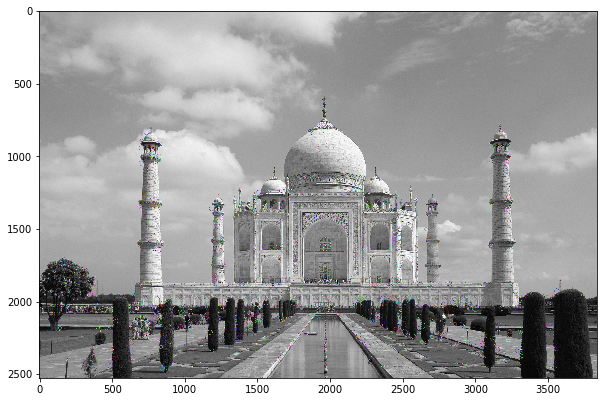

In [47]:
rich_sift_keypoints = skimage.io.imread('rich_sift_pisa_keypoints.jpg')

plt.figure(figsize = (10, 10))
plt.imshow(rich_sift_keypoints, cmap = 'gray');